In [20]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt

## Load the dataset

Our dataset contains different traininig images that belongs to 10 classes

In [21]:
(X_train,y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()

In [22]:
## shape 
X_train.shape

(60000, 28, 28)

In [23]:
y_train.shape

(60000,)

## VISUALIZATION

In [24]:
def plot(x):
    plt.figure(figsize=(5,5))
    plt.imshow(X_train[x])

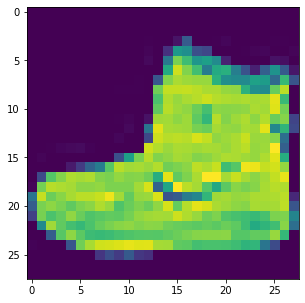

In [25]:
plot(0)

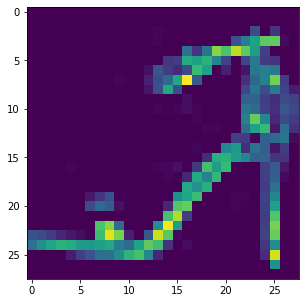

In [26]:
plot(8)

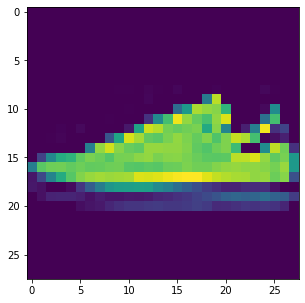

In [27]:
plot(6)

In [37]:
classes = ['T-shirt/top',  'Trouser' ,' Pullover' ,'Dress' ,' Coat', 'Sandal' ,' Shirt' ,'Sneaker',  'Bag'  'Ankle boot']

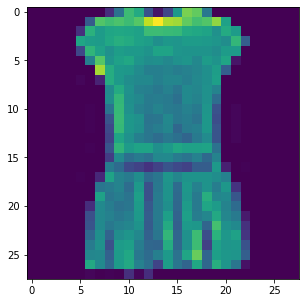

In [38]:
plot(3)

In [55]:
classes[y_train[5]]

' Pullover'

In [56]:
y_train[0:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [57]:
y_test.shape

(10000,)

## Preprocessing scale images

In [59]:
X_train_scaled = X_train /255
X_test_scaled = X_test /255

In [62]:
y_train[:8]

array([9, 0, 0, 3, 0, 2, 7, 2], dtype=uint8)

In [63]:
y_train_categorical = keras.utils.to_categorical(y_train,num_classes=10 ,dtype='float32')


In [66]:
y_test_catgorical = keras.utils.to_categorical(y_test,num_classes=10 ,dtype='float32')

In [67]:
y_train[:8]

array([9, 0, 0, 3, 0, 2, 7, 2], dtype=uint8)

In [68]:
y_train_categorical[:8] ## also called one hot encoding

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## MODEL BUILDING AND TRAINING

In [72]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,)),
    keras.layers.Dense(4000, activation = 'relu'),
    keras.layers.Dense(500, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid') 
])
model.compile(optimizer= 'SGD', loss='categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(X_train_scaled,y_train_categorical, epochs = 1)

1875/1875 [==============================] - 56s 30ms/step - loss: 0.6333 - accuracy: 0.7929


## Makes some prediction

In [73]:
np.argmax(model.predict(X_test_scaled)[7])

6

In [74]:
y_test[7]

6

In [76]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28,)),
        keras.layers.Dense(4000, activation = 'relu'),
        keras.layers.Dense(500, activation = 'relu'),
        keras.layers.Dense(10, activation = 'sigmoid') 
        ])
    model.compile(optimizer= 'SGD', loss='categorical_crossentropy',
             metrics = ['accuracy'])
    model.fit(X_train_scaled,y_train_categorical, epochs = 1)
    return model

In [79]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1875/1875 [==============================] - 77s 41ms/step - loss: 0.4510 - accuracy: 0.8437
2min 39s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [78]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1875/1875 [==============================] - 71s 38ms/step - loss: 0.4520 - accuracy: 0.8428
2min 11s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
